In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.stats import gaussian_kde
import glob

In [3]:
period = 5
dealias = 2 / 3
eta = 0.01

data_folder = 'data'

2 files found.
['data/ns3d_strat_256_10/spectra1d.h5', 'data/ns3d_strat_256_5/spectra1d.h5']
Plot saved as 'multi_1d_spectra.png'


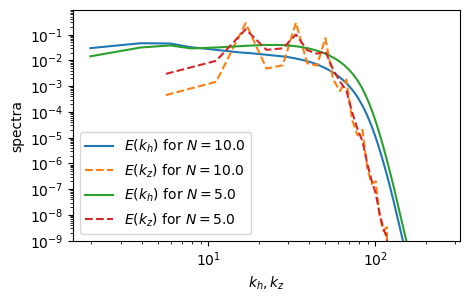

In [4]:
file_name = 'spectra1d.h5'

files = sorted(glob.glob(data_folder + "/ns3d_strat*/" + file_name))
print(f"{len(files)} files found.")
print(files)

k53 = True

plt.figure(figsize=(5, 3))

for file in files:
    N = float(file.split('/')[1].split('_')[-1])
    with h5py.File(file, 'r') as hdf_file:
        kx = dealias * hdf_file['kx'][:]
        ky = dealias * hdf_file['ky'][:]
        kz = dealias * hdf_file['kz'][:]
        spectra_E_kx = hdf_file['spectra_E_kx'][:]
        spectra_E_ky = hdf_file['spectra_E_ky'][:]
        spectra_E_kz = hdf_file['spectra_E_kz'][:]
        times = hdf_file['times'][:]
        
    kh = np.sqrt(kx**2 + ky**2)    
    spectra_E_kh = np.sqrt(spectra_E_kx**2 + spectra_E_ky**2)
    
    filtered_spectra_E_kh = spectra_E_kh[times > period]
    filtered_spectra_E_kz = spectra_E_kz[times > period]

    spectra_E_kh_mean = np.mean(filtered_spectra_E_kh, axis=0)
    spectra_E_kz_mean = np.mean(filtered_spectra_E_kz, axis=0)
        
    if k53:
        power = 5/3
    else:
        power = 0
        
    plt.loglog(kh[1:], spectra_E_kh_mean[1:] * kh[1:]**(power), '-', label=f'$E(k_h)$ for $N = {N:.1f}$')
    plt.loglog(kz[1:], spectra_E_kz_mean[1:] * kz[1:]**(power), '--', label=f'$E(k_z)$ for $N = {N:.1f}$')

    #plt.loglog(kx[1:], 10**-2 * kx[1:]**(-5/3), 'k--', label='$k^{-5/3}$')


    plt.xlabel('$k_h, k_z$')
    plt.ylabel('spectra')

    plt.ylim(bottom=10**-9)
    
plt.legend()
plt.savefig('multi_1d_spectra.png', dpi=300)
print("Plot saved as 'multi_1d_spectra.png'")
plt.show()

2 files found.
['data/ns3d_strat_256_10/state_phys_t0030.002.h5', 'data/ns3d_strat_256_5/state_phys_t0030.004.h5']
$F_h$:0.003 - 63912
N:10.0 - Re:101
$F_h$:0.030 - 742504
N:5.0 - Re:450
Plot saved as 'multi_richardson_pdf.png'


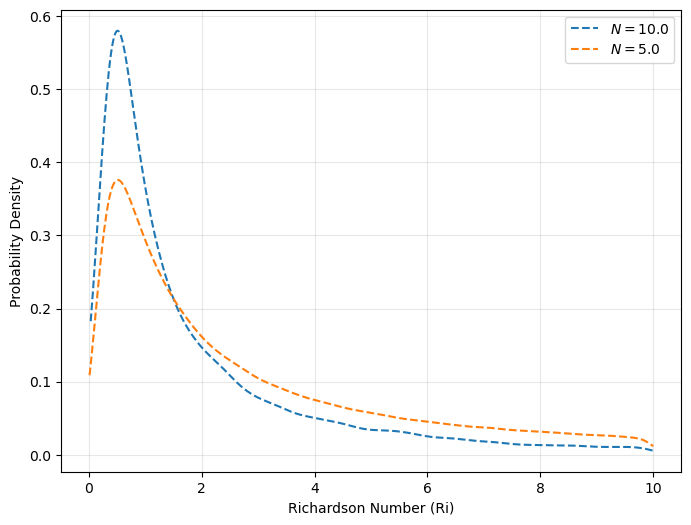

In [22]:
file_name = 'state_phys*.h5'

files = sorted(glob.glob(data_folder + "/ns3d_strat*/" + file_name))
print(f"{len(files)} files found.")
print(files)

Lz = 0.75
nz = 64
dz = Lz / nz

Lfh = 1.0
eps = 1.0

plt.figure(figsize=(8, 6))

for file in files:
    all_Ri = []
    N = float(file.split('/')[1].split('_')[-1])
    
    with h5py.File(file, 'r') as f:
        u = f['state_phys/vx'][:]
        v = f['state_phys/vy'][:]
        
        uh = np.sqrt(u**2 + v**2)
        duh_dz = np.gradient(uh, dz, axis=0).ravel()
        
        Ri = (N**2 / (duh_dz[duh_dz!=0]**2))
        all_Ri.append(Ri[Ri < 10])
        
    Fh = 1/2*(np.abs(np.mean(u)) + np.abs(np.mean(v))) / (N * Lfh)
        
    all_Ri_array = np.concatenate(all_Ri)
    Re = 1/2 * (np.abs(np.mean(u)) + np.abs(np.mean(v))) * 3 / 1e-6
    print(f'$F_h$:{Fh*1000:.3f} - {all_Ri_array.size}')
    print(f'N:{N} - Re:{Re:.0f}')

    # Compute and plot the KDE
    kde = gaussian_kde(all_Ri_array)
    x_vals = np.linspace(np.min(all_Ri_array), np.max(all_Ri_array), 500)
    plt.plot(x_vals, kde(x_vals),'--', label=f'$N = {N:.1f}$')

    plt.xlabel('Richardson Number (Ri)')
    plt.ylabel('Probability Density')
    plt.legend()

plt.grid(alpha=0.3)
plt.savefig('multi_richardson_pdf.png', dpi=300)
print("Plot saved as 'multi_richardson_pdf.png'")
plt.show()

In [30]:
C = 1.0
dx = 3 / 512
n = 2
eps = 1.0

nu = (dx / C) ** ((3 * n - 2) / 3) * eps ** (1 / 3)
print(nu)
print((nu / eps ** (1/3))**(3/(3 * n - 2)))

0.0010563351345024969
0.005859375000000002
